<a href="https://colab.research.google.com/github/lucasmeirellesmachado/CDIA-Estatistica_II/blob/main/Atividade_Avaliativa_2%C2%AA_Semana_de_Imersao_2%C2%AA_entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 2ª Semana de Imersão

### Discentes:
Aracy Siqueira de Oliveira Nunes Braga; Cristiane Alves dos Santos;Lucas Meirelles Machado



### Objetivo:
O objetivo desta atividade é descrever os dados de internação hospitalar no SUS, referente às informações do município de Manaus, durante o mês de abril de 2024.

### Passos iniciais

In [2]:
# Importar as bibliotecas que serão utilizadas durante a atividade

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [3]:
# Importar a base de dados

SIH_completo = pd.read_csv('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Cópia de RD202404.csv',
                           sep=';',
                           low_memory=False)

In [4]:
# Importar planilha das convenções SIH

conv_espec = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="ESPEC")
conv_ident = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="IDENT")
conv_sexo = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="SEXO")
conv_cobranca = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="COBRANCA")
conv_gestao = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="GESTAO")
conv_vdrl = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="IND_VDRL")
conv_cod_idade = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="COD_IDADE")
conv_morte = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="MORTE")
conv_car_int = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="CAR_INT")
conv_gestao = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="GESTAO")
conv_instrucao = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="INSTRU")
conv_gest_risco = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="GESTRISCO")
conv_vinc_prev = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="VINCPREV")
conv_infe_hosp = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="INFEHOSP")
conv_raca_cor = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="RACA_COR")
conv_contracep1 = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="CONTRACEP1")
conv_contracep2 = pd.read_excel('/content/drive/MyDrive/Especialização em Ciência de Dados e Inteligência Artificial/Estatística Aplicada II/Convenções SIH RD.xlsx', sheet_name="CONTRACEP2")

In [5]:
SIH_completo

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
0,120000,2024,4,3,4.034526e+12,1224100201423,1,69970000,120060,19970918,...,NaN,0,0,0,0,0,0,0,0,0
1,120000,2024,4,2,4.034526e+12,1224100162714,1,69985000,120042,20031024,...,NaN,0,0,0,0,0,0,0,0,0
2,120000,2024,4,2,4.034526e+12,1224100162901,1,69990000,120033,20070111,...,NaN,0,0,0,0,0,0,0,0,0
3,120000,2024,4,3,4.034526e+12,1224100100652,1,69990000,120033,19730304,...,NaN,0,0,0,0,0,0,0,0,0
4,120000,2024,4,3,4.034526e+12,1224100100685,1,69990000,120033,19461009,...,NaN,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220163,172120,2024,4,3,NaN,1724100353085,1,77900000,172120,19920101,...,NaN,0,0,0,0,0,0,0,0,0
1220164,172120,2024,4,3,NaN,1724100353096,1,77900000,172120,20210417,...,NaN,0,0,0,0,0,0,0,0,0
1220165,172120,2024,4,3,NaN,1724100353107,1,77900000,172120,20210714,...,NaN,0,0,0,0,0,0,0,0,0
1220166,172120,2024,4,3,NaN,1724100353118,1,77900000,172120,19980922,...,NaN,0,0,0,0,0,0,0,0,0


In [6]:
pd.options.display.max_info_columns = 113
SIH_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220168 entries, 0 to 1220167
Data columns (total 113 columns):
 #    Column      Non-Null Count    Dtype  
---   ------      --------------    -----  
 0    UF_ZI       1220168 non-null  int64  
 1    ANO_CMPT    1220168 non-null  int64  
 2    MES_CMPT    1220168 non-null  int64  
 3    ESPEC       1220168 non-null  int64  
 4    CGC_HOSP    906782 non-null   float64
 5    N_AIH       1220168 non-null  int64  
 6    IDENT       1220168 non-null  int64  
 7    CEP         1220168 non-null  int64  
 8    MUNIC_RES   1220168 non-null  int64  
 9    NASC        1220168 non-null  int64  
 10   SEXO        1220168 non-null  int64  
 11   UTI_MES_IN  1220168 non-null  int64  
 12   UTI_MES_AN  1220168 non-null  int64  
 13   UTI_MES_AL  1220168 non-null  int64  
 14   UTI_MES_TO  1220168 non-null  int64  
 15   MARCA_UTI   1220168 non-null  int64  
 16   UTI_INT_IN  1220168 non-null  int64  
 17   UTI_INT_AN  1220168 non-null  int64  
 18   

### Organizando o banco de dados para posterior análise

In [7]:
# Filtrar base para obter os dados do município de Manaus

SIH_MANAUS = SIH_completo[SIH_completo['MUNIC_RES'] == 130260]

In [8]:
SIH_MANAUS

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
804,120000,2024,4,3,4.034526e+12,1224100084603,1,69020141,130260,19370420,...,NaN,0,0,0,0,0,0,0,0,0
4048,120000,2024,4,3,4.034526e+12,1224100152088,1,69028120,130260,20000210,...,NaN,0,0,0,0,0,0,0,0,0
20157,130000,2024,4,3,6.972950e+11,1324100333622,1,69021005,130260,19761228,...,NaN,0,0,0,0,0,0,0,0,0
20158,130000,2024,4,3,6.972950e+11,1324100333666,1,69057000,130260,19880225,...,NaN,0,0,0,0,0,0,0,0,0
20159,130000,2024,4,3,6.972950e+11,1324100342488,1,69020210,130260,19480702,...,NaN,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174041,350000,2024,4,1,4.915035e+13,3524102146862,1,69099318,130260,20220205,...,NaN,1,0,0,0,0,0,0,0,0
1188631,350000,2024,4,9,4.915035e+13,3524102146543,1,69068040,130260,20190121,...,NaN,0,0,0,0,0,0,0,0,0
1190896,350000,2024,4,1,4.915035e+13,3524102148424,1,69047460,130260,19980207,...,NaN,0,0,0,0,0,0,0,0,0
1201934,350000,2024,4,7,6.097574e+13,3524107477616,1,69087230,130260,20110613,...,NaN,0,0,0,0,0,0,0,0,0


In [9]:
SIH_MANAUS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9897 entries, 804 to 1210968
Data columns (total 113 columns):
 #    Column      Non-Null Count  Dtype  
---   ------      --------------  -----  
 0    UF_ZI       9897 non-null   int64  
 1    ANO_CMPT    9897 non-null   int64  
 2    MES_CMPT    9897 non-null   int64  
 3    ESPEC       9897 non-null   int64  
 4    CGC_HOSP    9404 non-null   float64
 5    N_AIH       9897 non-null   int64  
 6    IDENT       9897 non-null   int64  
 7    CEP         9897 non-null   int64  
 8    MUNIC_RES   9897 non-null   int64  
 9    NASC        9897 non-null   int64  
 10   SEXO        9897 non-null   int64  
 11   UTI_MES_IN  9897 non-null   int64  
 12   UTI_MES_AN  9897 non-null   int64  
 13   UTI_MES_AL  9897 non-null   int64  
 14   UTI_MES_TO  9897 non-null   int64  
 15   MARCA_UTI   9897 non-null   int64  
 16   UTI_INT_IN  9897 non-null   int64  
 17   UTI_INT_AN  9897 non-null   int64  
 18   UTI_INT_AL  9897 non-null   int64  
 19   UTI_

In [10]:
# Excluir colunas que não serão utilizadas

SIH_MANAUS = SIH_MANAUS.drop(columns=['UF_ZI',
                                   'ANO_CMPT',
                                   'MES_CMPT',
                                   'CGC_HOSP',
                                   'N_AIH',
                                   'CEP',
                                   'NASC',
                                   'UTI_MES_IN',
                                   'UTI_MES_AN',
                                   'UTI_MES_AL',
                                   'UTI_MES_TO',
                                   'MARCA_UTI',
                                   'UTI_INT_IN',
                                   'UTI_INT_AN',
                                   'UTI_INT_AL',
                                   'UTI_INT_TO',
                                   'VAL_SADT',
                                   'VAL_RN',
                                   'VAL_ACOMP',
                                   'VAL_ORTP',
                                   'VAL_SANGUE',
                                   'VAL_SADTSR',
                                   'VAL_TRANSP',
                                   'VAL_OBSANG',
                                   'VAL_PED1AC',
                                   'VAL_UTI',
                                   'NAT_JUR',
                                   'RUBRICA',
                                   'HOMONIMO',
                                   'MUNIC_MOV',
                                   'NUM_PROC',
                                   'TOT_PT_SP',
                                   'SEQ_AIH5',
                                   'CNAER',
                                   'GESTOR_COD',
                                   'GESTOR_TP',
                                   'GESTOR_CPF',
                                   'GESTOR_DT',
                                   'CNPJ_MANT',
                                   'COMPLEX',
                                   'FINANC',
                                   'FAEC_TP',
                                   'REGCT',
                                   'AUD_JUST',
                                   'SIS_JUST',
                                   'VAL_SH_FED',
                                   'VAL_SP_FED',
                                   'VAL_SH_GES',
                                   'VAL_SP_GES',
                                   'VAL_UCI',
                                   'MARCA_UCI',
                                   'CPF_AUT',
                                   'SEQUENCIA',
                                   'REMESSA'])

In [11]:
SIH_MANAUS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9897 entries, 804 to 1210968
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ESPEC       9897 non-null   int64  
 1   IDENT       9897 non-null   int64  
 2   MUNIC_RES   9897 non-null   int64  
 3   SEXO        9897 non-null   int64  
 4   DIAR_ACOM   9897 non-null   int64  
 5   QT_DIARIAS  9897 non-null   int64  
 6   PROC_SOLIC  9897 non-null   int64  
 7   PROC_REA    9897 non-null   int64  
 8   VAL_SH      9897 non-null   float64
 9   VAL_SP      9897 non-null   float64
 10  VAL_TOT     9897 non-null   float64
 11  US_TOT      9897 non-null   float64
 12  DT_INTER    9897 non-null   int64  
 13  DT_SAIDA    9897 non-null   int64  
 14  DIAG_PRINC  9897 non-null   object 
 15  DIAG_SECUN  9897 non-null   int64  
 16  COBRANCA    9897 non-null   int64  
 17  NATUREZA    9897 non-null   int64  
 18  GESTAO      9897 non-null   int64  
 19  IND_VDRL    9897 non-null  

In [12]:
# Verificamos que as colunas de diagnóstico secundário 4 a 9 estão vazias.
# Assim, iremos inferir que os mesmos significam que o usuário não possui esses diagnósticos e, assim, iremos excluir essas colunas também.

SIH_diag = SIH_MANAUS.drop(columns=['DIAGSEC4',
                                    'DIAGSEC5',
                                    'DIAGSEC6',
                                    'DIAGSEC7',
                                    'DIAGSEC8',
                                    'DIAGSEC9'])

In [13]:
# Considerando que as colunas de tipo de diagnóstico possui como convenção valores numéricos, iremos verificar se estes valores são iguais a zero (NA).
# Caso assim o forem, também iremos excluí-las.

SIH_diag.describe()

,ESPEC,IDENT,MUNIC_RES,SEXO,DIAR_ACOM,QT_DIARIAS,PROC_SOLIC,PROC_REA,VAL_SH,VAL_SP,...,ETNIA,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
count,9897.00000,9897.0,9897.0,9897.000000,9897.000000,9897.000000,9.897000e+03,9.897000e+03,9897.000000,9897.000000,...,9897.000000,9897.000000,9897.000000,9897.000000,9897.0,9897.0,9897.0,9897.0,9897.0,9897.0
mean,2.86309,1.0,130260.0,2.146812,5.189552,5.866525,3.487579e+08,3.488210e+08,1436.246235,330.388103,...,0.397696,0.232091,0.000606,0.000101,0.0,0.0,0.0,0.0,0.0,0.0
std,2.13853,0.0,0.0,0.989214,6.569574,6.915931,5.316009e+07,5.322057e+07,3899.368098,802.999578,...,8.529152,0.576231,0.028426,0.010052,0.0,0.0,0.0,0.0,0.0,0.0
min,1.00000,1.0,130260.0,1.000000,0.000000,0.000000,2.010103e+08,2.010103e+08,20.400000,3.050000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.00000,1.0,130260.0,1.000000,1.000000,2.000000,3.030903e+08,3.030901e+08,358.250000,66.350000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,2.00000,1.0,130260.0,3.000000,3.000000,3.000000,3.100100e+08,3.100100e+08,567.420000,149.320000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,3.00000,1.0,130260.0,3.000000,6.000000,7.000000,4.080505e+08,4.080505e+08,1040.470000,323.870000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,12.00000,1.0,130260.0,3.000000,94.000000,108.000000,5.060201e+08,5.060201e+08,112163.350000,19441.810000,...,255.000000,2.000000,2.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Constatamos que há valores diferentes de zero nas colunas de tipo de diagnóstico secundário 1, 2 e 3.
# Portanto, iremos mantê-las e excluir as colunas de tipo de diagnóstico secundário de número 4 a 9.

SIH_FINAL = SIH_diag.drop(columns=['TPDISEC4',
                                   'TPDISEC5',
                                   'TPDISEC6',
                                   'TPDISEC7',
                                   'TPDISEC8',
                                   'TPDISEC9'])

In [15]:
SIH_FINAL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9897 entries, 804 to 1210968
Data columns (total 47 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ESPEC       9897 non-null   int64  
 1   IDENT       9897 non-null   int64  
 2   MUNIC_RES   9897 non-null   int64  
 3   SEXO        9897 non-null   int64  
 4   DIAR_ACOM   9897 non-null   int64  
 5   QT_DIARIAS  9897 non-null   int64  
 6   PROC_SOLIC  9897 non-null   int64  
 7   PROC_REA    9897 non-null   int64  
 8   VAL_SH      9897 non-null   float64
 9   VAL_SP      9897 non-null   float64
 10  VAL_TOT     9897 non-null   float64
 11  US_TOT      9897 non-null   float64
 12  DT_INTER    9897 non-null   int64  
 13  DT_SAIDA    9897 non-null   int64  
 14  DIAG_PRINC  9897 non-null   object 
 15  DIAG_SECUN  9897 non-null   int64  
 16  COBRANCA    9897 non-null   int64  
 17  NATUREZA    9897 non-null   int64  
 18  GESTAO      9897 non-null   int64  
 19  IND_VDRL    9897 non-null  

In [16]:
# Agora, iremos susbtituir os valores nulos nas colunas de diagnóstico secundário por células vazias

SIH_FINAL = SIH_FINAL.fillna ({'DIAGSEC1': '',
                               'DIAGSEC2': '',
                               'DIAGSEC3': ''})

In [17]:
SIH_FINAL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9897 entries, 804 to 1210968
Data columns (total 47 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ESPEC       9897 non-null   int64  
 1   IDENT       9897 non-null   int64  
 2   MUNIC_RES   9897 non-null   int64  
 3   SEXO        9897 non-null   int64  
 4   DIAR_ACOM   9897 non-null   int64  
 5   QT_DIARIAS  9897 non-null   int64  
 6   PROC_SOLIC  9897 non-null   int64  
 7   PROC_REA    9897 non-null   int64  
 8   VAL_SH      9897 non-null   float64
 9   VAL_SP      9897 non-null   float64
 10  VAL_TOT     9897 non-null   float64
 11  US_TOT      9897 non-null   float64
 12  DT_INTER    9897 non-null   int64  
 13  DT_SAIDA    9897 non-null   int64  
 14  DIAG_PRINC  9897 non-null   object 
 15  DIAG_SECUN  9897 non-null   int64  
 16  COBRANCA    9897 non-null   int64  
 17  NATUREZA    9897 non-null   int64  
 18  GESTAO      9897 non-null   int64  
 19  IND_VDRL    9897 non-null  

### Concatenando os dados da planilha SIH com a planilha de convenções

In [18]:
# Concatenar os códigos da especialidade de internação com o nome das especialidades dadas pela planilha de Convenções SIH
SIH_concat_espec = pd.merge(SIH_FINAL, conv_espec, on='ESPEC')
# Excluir coluna "ESPEC"
SIH_concat_espec = SIH_concat_espec.drop(columns=['ESPEC'])
# Renomear coluna "Valor" para "ESPEC"
SIH_concat_espec = SIH_concat_espec.rename(columns={'Valor': 'ESPEC'})

In [19]:
# Concatenar os códigos da identificação da internação com o nome das identificações dadas pela planilha de Convenções SIH
SIH_concat_ident = pd.merge(SIH_concat_espec, conv_ident, on='IDENT')
# Excluir coluna "IDENT"
SIH_concat_ident = SIH_concat_ident.drop(columns=['IDENT'])
# Renomear coluna "Valor" para "IDENT"
SIH_concat_ident = SIH_concat_ident.rename(columns={'Valor': 'IDENT'})

In [20]:
# Concatenar os códigos do motivo de permanência/saída do usuário com o nome das identificações dadas pela planilha de Convenções SIH
SIH_concat_cobranca = pd.merge(SIH_concat_ident, conv_cobranca, on='COBRANCA')
# Excluir coluna "COBRANCA"
SIH_concat_cobranca = SIH_concat_cobranca.drop(columns=['COBRANCA'])
# Renomear coluna "Valor" para "COBRANCA"
SIH_concat_cobranca = SIH_concat_cobranca.rename(columns={'Valor': 'COBRANCA'})

In [21]:
# Concatenar os códigos da raça/cor com os nomes dados pela planilha de Convenções SIH
SIH_concat_raca_cor = pd.merge(SIH_concat_cobranca, conv_raca_cor, on='RACA_COR')
# Excluir coluna "RACA_COR"
SIH_concat_raca_cor = SIH_concat_raca_cor.drop(columns=['RACA_COR'])
# Renomear coluna "Valor" para "RACA_COR"
SIH_concat_raca_cor = SIH_concat_raca_cor.rename(columns={'Valor': 'RACA_COR'})

In [22]:
# Concatenar os códigos da instrução com o nome das especialidades dadas pela planilha de Convenções SIH
SIH_concat_instru = pd.merge(SIH_concat_raca_cor, conv_instrucao, on='INSTRU')
# Excluir coluna "INSTRU"
SIH_concat_instru = SIH_concat_instru.drop(columns=['INSTRU'])
# Renomear coluna "Valor" para "INSTRU"
SIH_concat_instru = SIH_concat_instru.rename(columns={'Valor': 'INSTRU'})

In [23]:
# Concatenar os códigos da identificação da internação com o nome dados pela planilha de Convenções SIH
SIH_concat_sex = pd.merge(SIH_concat_instru, conv_sexo, on='SEXO')
# Excluir coluna "SEXO"
SIH_concat_sex = SIH_concat_sex.drop(columns=['SEXO'])
# Renomear coluna "Valor" para "SEXO"
SIH_concat_sex = SIH_concat_sex.rename(columns={'Valor': 'SEXO'})

In [24]:
# Concatenar os códigos de morte com o nome dados pela planilha de Convenções SIH
SIH_concat_morte = pd.merge(SIH_concat_sex, conv_morte, on='MORTE')
# Excluir coluna "MORTE"
SIH_concat_morte = SIH_concat_morte.drop(columns=['MORTE'])
# Renomear coluna "Valor" para "MORTE"
SIH_concat_morte = SIH_concat_morte.rename(columns={'Valor': 'MORTE'})

In [25]:
# Concatenar os códigos de caráter de internação com o nome dados pela planilha de Convenções SIH
SIH_concat_car_int = pd.merge(SIH_concat_morte, conv_car_int, on='CAR_INT')
# Excluir coluna "CAR_INT"
SIH_concat_car_int = SIH_concat_car_int.drop(columns=['CAR_INT'])
# Renomear coluna "Valor" para "CAR_INT"
SIH_concat_car_int = SIH_concat_car_int.rename(columns={'Valor': 'CAR_INT'})

In [26]:
# Concatenar os códigos de tipo de gestão com o nome dados pela planilha de Convenções SIH
SIH_concat_gestao = pd.merge(SIH_concat_car_int, conv_gestao, on='GESTAO')
# Excluir coluna "GESTAO"
SIH_concat_gestao = SIH_concat_gestao.drop(columns=['GESTAO'])
# Renomear coluna "Valor" para "GESTAO"
SIH_concat_gestao = SIH_concat_gestao.rename(columns={'Valor': 'GESTAO'})

In [27]:
# Concatenar os códigos de código de idade com o nome dados pela planilha de Convenções SIH
SIH_concat_cod_idade = pd.merge(SIH_concat_gestao, conv_cod_idade, on='COD_IDADE')
# Excluir coluna "COD_IDADE"
SIH_concat_cod_idade = SIH_concat_cod_idade.drop(columns=['COD_IDADE'])
# Renomear coluna "Valor" para "COD_IDADE"
SIH_concat_cod_idade = SIH_concat_cod_idade.rename(columns={'Valor': 'COD_IDADE'})

In [28]:
# Concatenar os códigos de vínculo previdenciário com o nome dados pela planilha de Convenções SIH
SIH_concat_vinc_prev = pd.merge(SIH_concat_cod_idade, conv_vinc_prev, on='VINCPREV')
# Excluir coluna "VINCPREV"
SIH_concat_vinc_prev = SIH_concat_vinc_prev.drop(columns=['VINCPREV'])
# Renomear coluna "Valor" para "VINCPREV"
SIH_concat_vinc_prev = SIH_concat_vinc_prev.rename(columns={'Valor': 'VINCPREV'})

In [29]:
# Concatenar os códigos de gestação de risco com o nome dados pela planilha de Convenções SIH
SIH_concat_gest_risco = pd.merge(SIH_concat_vinc_prev, conv_gest_risco, on='GESTRISCO')
# Excluir coluna "GESTRISCO"
SIH_concat_gest_risco = SIH_concat_gest_risco.drop(columns=['GESTRISCO'])
# Renomear coluna "Valor" para "GESTRISCO"
SIH_concat_gest_risco = SIH_concat_gest_risco.rename(columns={'Valor': 'GESTRISCO'})

In [30]:
# Concatenar os códigos de contraceptivo 1 com o nome dados pela planilha de Convenções SIH
SIH_concat_contracep1 = pd.merge(SIH_concat_gest_risco, conv_contracep1, on='CONTRACEP1')
# Excluir coluna "CONTRACEP1"
SIH_concat_contracep1 = SIH_concat_contracep1.drop(columns=['CONTRACEP1'])
# Renomear coluna "Valor" para "CONTRACEP1"
SIH_concat_contracep1 = SIH_concat_contracep1.rename(columns={'Valor': 'CONTRACEP1'})

In [31]:
# Concatenar os códigos de contraceptivo 2 com o nome dados pela planilha de Convenções SIH
SIH_concat_contracep2 = pd.merge(SIH_concat_contracep1, conv_contracep2, on='CONTRACEP2')
# Excluir coluna "CONTRACEP2"
SIH_concat_contracep2 = SIH_concat_contracep2.drop(columns=['CONTRACEP2'])
# Renomear coluna "Valor" para "CONTRACEP2"
SIH_concat_contracep2 = SIH_concat_contracep2.rename(columns={'Valor': 'CONTRACEP2'})

In [32]:
# Concatenar os códigos de realização de VDRL com o nome dados pela planilha de Convenções SIH
SIH_concat_vdrl = pd.merge(SIH_concat_contracep2, conv_vdrl, on='IND_VDRL')
# Excluir coluna "IND_VDRL"
SIH_concat_vdrl = SIH_concat_vdrl.drop(columns=['IND_VDRL'])
# Renomear coluna "Valor" para "IND_VDRL", renomeando também o dataframe final, a fim de utilizá-lo por agora em diante nas análises subsequentes
SIH_CONCAT = SIH_concat_vdrl.rename(columns={'Valor': 'IND_VDRL'})

In [33]:
SIH_CONCAT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9894 entries, 0 to 9893
Data columns (total 47 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MUNIC_RES   9894 non-null   int64  
 1   DIAR_ACOM   9894 non-null   int64  
 2   QT_DIARIAS  9894 non-null   int64  
 3   PROC_SOLIC  9894 non-null   int64  
 4   PROC_REA    9894 non-null   int64  
 5   VAL_SH      9894 non-null   float64
 6   VAL_SP      9894 non-null   float64
 7   VAL_TOT     9894 non-null   float64
 8   US_TOT      9894 non-null   float64
 9   DT_INTER    9894 non-null   int64  
 10  DT_SAIDA    9894 non-null   int64  
 11  DIAG_PRINC  9894 non-null   object 
 12  DIAG_SECUN  9894 non-null   int64  
 13  NATUREZA    9894 non-null   int64  
 14  IDADE       9894 non-null   int64  
 15  DIAS_PERM   9894 non-null   int64  
 16  NACIONAL    9894 non-null   int64  
 17  NUM_FILHOS  9894 non-null   int64  
 18  CID_NOTIF   117 non-null    object 
 19  INSC_PN     9894 non-null  

In [34]:
# Agora, iremos susbtituir os valores nulos nas colunas de CID_NOTIF, INSTRU, VINCPREV, CONTRACEP1 e CONTRACEP2 por células vazias

SIHFINAL = SIH_CONCAT.fillna ({'CID_NOTIF': '',
                               'INSTRU': '',
                               'VINCPREV': '',
                               'CONTRACEP1': '',
                               'CONTRACEP2': ''})

In [35]:
SIHFINAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9894 entries, 0 to 9893
Data columns (total 47 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MUNIC_RES   9894 non-null   int64  
 1   DIAR_ACOM   9894 non-null   int64  
 2   QT_DIARIAS  9894 non-null   int64  
 3   PROC_SOLIC  9894 non-null   int64  
 4   PROC_REA    9894 non-null   int64  
 5   VAL_SH      9894 non-null   float64
 6   VAL_SP      9894 non-null   float64
 7   VAL_TOT     9894 non-null   float64
 8   US_TOT      9894 non-null   float64
 9   DT_INTER    9894 non-null   int64  
 10  DT_SAIDA    9894 non-null   int64  
 11  DIAG_PRINC  9894 non-null   object 
 12  DIAG_SECUN  9894 non-null   int64  
 13  NATUREZA    9894 non-null   int64  
 14  IDADE       9894 non-null   int64  
 15  DIAS_PERM   9894 non-null   int64  
 16  NACIONAL    9894 non-null   int64  
 17  NUM_FILHOS  9894 non-null   int64  
 18  CID_NOTIF   9894 non-null   object 
 19  INSC_PN     9894 non-null  

### Análise exploratória dos dados

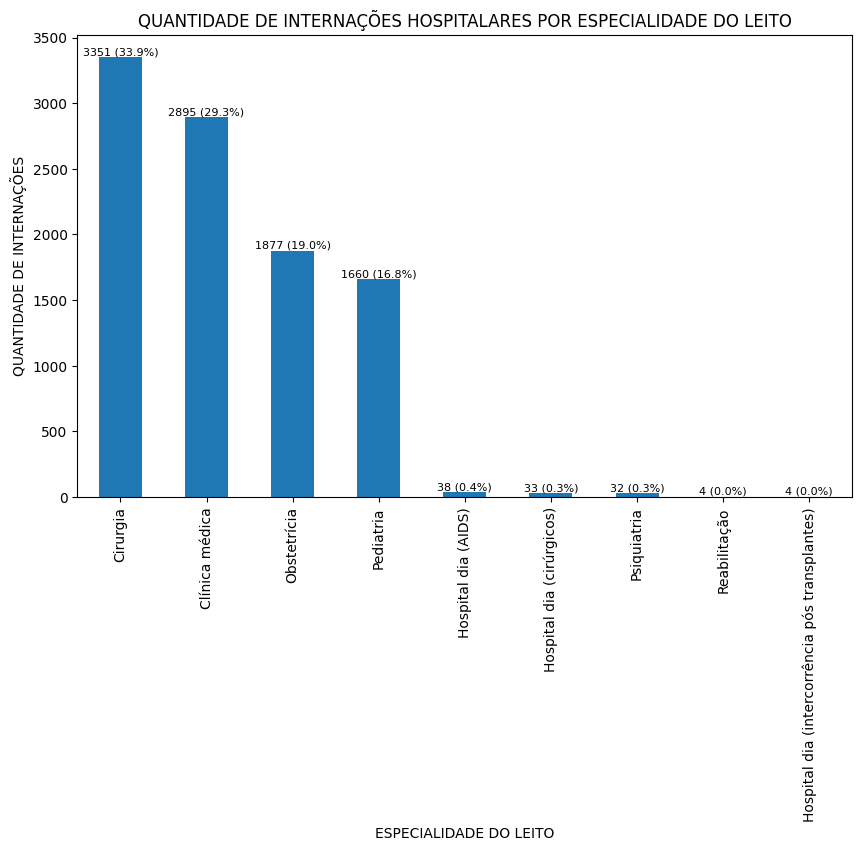

In [36]:
# Ver a contagem e proporção de internações hospitalares por especialidade do leito

# Calcular os valores de contagem
value_counts = SIH_CONCAT['ESPEC'].value_counts()

# Calcular o total de elementos para calcular a porcentagem
total = value_counts.sum()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = value_counts.plot(kind='bar')

# Adicionar os valores e as porcentagens nas barras
for i, v in enumerate(value_counts):
    percentage = (v / total) * 100
    ax.text(i, v + 0.1, f'{v} ({percentage:.1f}%)', ha='center', va='bottom', fontsize=8)

# Adicionar título e rótulos aos eixos
plt.title('QUANTIDADE DE INTERNAÇÕES HOSPITALARES POR ESPECIALIDADE DO LEITO')
plt.xlabel('ESPECIALIDADE DO LEITO')
plt.ylabel('QUANTIDADE DE INTERNAÇÕES')

# Alterar o ângulo dos rótulos do eixo X
plt.xticks(rotation=90)

plt.show()

In [37]:
SIH_CONCAT['ESPEC'].value_counts(normalize=True)*100

,proportion
ESPEC,
Cirurgia,33.869012
Clínica médica,29.260158
Obstetrícia,18.971094
Pediatria,16.777845
Hospital dia (AIDS),0.384071
Hospital dia (cirúrgicos),0.333535
Psiquiatria,0.323428
Reabilitação,0.040429
Hospital dia (intercorrência pós transplantes),0.040429


Temos 33,9% de leitos cirúrgicos, 29,3% de leitos de clínica médica, 19% de leitos obstétricos, 16,8% de leitos pediátricos, 0,4% de leitos hospital-dia (AIDS), 0,3% de leitos de hospital-dia (cirúrgicos), 0,3% de leitos psiquiátricos e 0,04% de leitos de reabilitação e 0,04% de leitos de hospital-dia (intercorrência pós-transplantes). Assim, os leitos cirúrgicos, de clínica médica, obstétricos e pediátricos representam aproximadamente 98,91% do total de leitos utilizados no mês estudado.

In [38]:
# Verificando a proporção de identificação de AIH

SIH_CONCAT['IDENT'].value_counts(normalize=True)*100

,proportion
IDENT,
Principal,100.0


No período estudado, 100% das AIH são do tipo 1 - Principal, ou seja, indica que todas as internações foram internações iniciais.

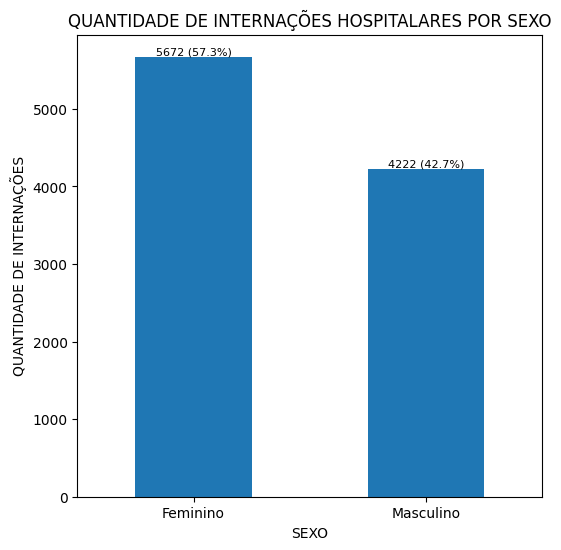

In [39]:
# Ver a contagem e proporção de internações hospitalares por sexo

# Calcular os valores de contagem
value_sex = SIH_CONCAT['SEXO'].value_counts()

# Calcular o total de elementos para calcular a porcentagem
total = value_counts.sum()

# Criar o gráfico de barras
plt.figure(figsize=(6, 6))
ax1 = value_sex.plot(kind='bar')

# Adicionar os valores e as porcentagens nas barras
for i, v in enumerate(value_sex):
    percentage = (v / total) * 100
    ax1.text(i, v + 0.1, f'{v} ({percentage:.1f}%)', ha='center', va='bottom', fontsize=8)

# Adicionar título e rótulos aos eixos
plt.title('QUANTIDADE DE INTERNAÇÕES HOSPITALARES POR SEXO')
plt.xlabel('SEXO')
plt.ylabel('QUANTIDADE DE INTERNAÇÕES')

# Alterar o ângulo dos rótulos do eixo X
plt.xticks(rotation=0)

plt.show()

No período estudado, 57,3% dos usuários internados são do sexo feminino, enquanto que 42,7% são do sexo masculino.

In [40]:
# Verificar a distribuição dos dados referente à quantidade de diárias durante a internação

SIH_CONCAT['QT_DIARIAS'].describe()

,QT_DIARIAS
count,9894.000000
mean,5.865373
std,6.915459
min,0.000000
25%,2.000000
50%,3.000000
75%,7.000000
max,108.000000


Text(0, 0.5, 'Tempo de internação, em dias')

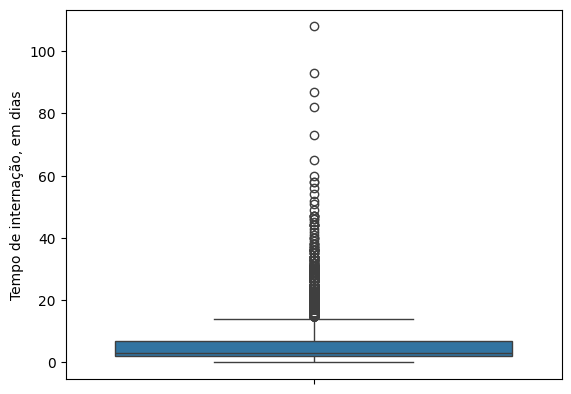

In [41]:
# Visualização gráfica da distribuição dos dados referente ao tempo de internação, em dias

ax2 = sns.boxplot(y='QT_DIARIAS', data=SIH_CONCAT)
ax2.set_ylabel('Tempo de internação, em dias')

Pode-se observar que até 75% dos dados se concentram em internações de até 7 dias. Porém, tem-se grande quantidade de valores outliers, sendo que a internação mais longa foi de 108 dias.

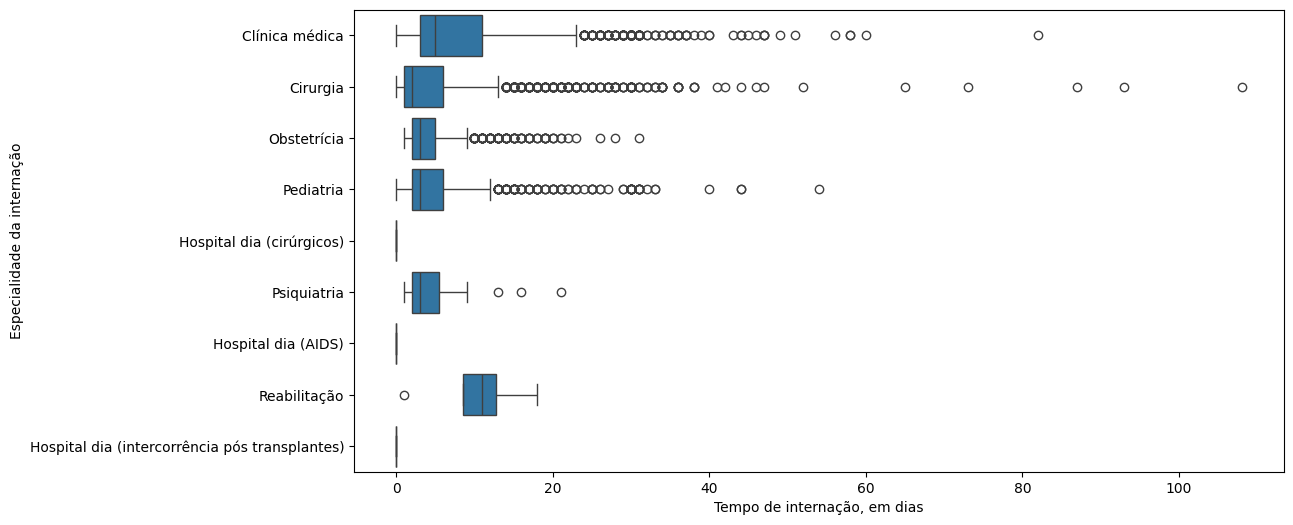

In [42]:
# Visualização gráfica da distribuição do tempo de internação, dependendo da especialidade da internação (dados que podem ser visualizados com ou sem os outliers)

plt.figure(figsize=(12, 6))
ax3 = sns.boxplot(x='QT_DIARIAS', y='ESPEC',
                  data=SIH_CONCAT,
                  #showfliers=False
                  )
ax3.set_xlabel('Tempo de internação, em dias')
ax3.set_ylabel('Especialidade da internação')
plt.xticks(rotation=0)
plt.show()

In [43]:
# Verificar a média do tempo de internação, em dias, dos dados acima

SIH_CONCAT['QT_DIARIAS'].groupby(SIH_CONCAT['ESPEC']).describe()

,count,mean,std,min,25%,50%,75%,max
ESPEC,,,,,,,,
Cirurgia,3351.0,5.154282,7.060997,0.0,1.0,2.0,6.00,108.0
Clínica médica,2895.0,8.454231,8.482098,0.0,3.0,5.0,11.00,82.0
Hospital dia (AIDS),38.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
Hospital dia (cirúrgicos),33.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
Hospital dia (intercorrência pós transplantes),4.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
Obstetrícia,1877.0,4.255194,3.122649,1.0,2.0,3.0,5.00,31.0
Pediatria,1660.0,4.882530,5.408346,0.0,2.0,3.0,6.00,54.0
Psiquiatria,32.0,4.750000,4.593122,1.0,2.0,3.0,5.50,21.0
Reabilitação,4.0,10.250000,6.994045,1.0,8.5,11.0,12.75,18.0


Pode-se observar 75% dos dados encontram-se em um tempo de internação abaixo de 13 dias (sendo o maior período deles os de leitos de reabilitação, com 12,75 dias; e o menor sendo os leitos obstétricos, com 5 dias). Porém, temos diversos outliers, e os tempos máximos de internação observados foram de 108 dias nos leitos cirúrgicos e 82 dias nos leitos de clínica médica.

In [44]:
# Verificar a distribuição dos dados referente ao valor total da AIH

SIH_CONCAT['VAL_TOT'].describe()

,VAL_TOT
count,9894.000000
mean,1812.807066
std,4579.130411
min,23.450000
25%,469.170000
50%,781.980000
75%,1438.667500
max,129197.240000


Text(0, 0.5, 'Valor total da AIH, em reais')

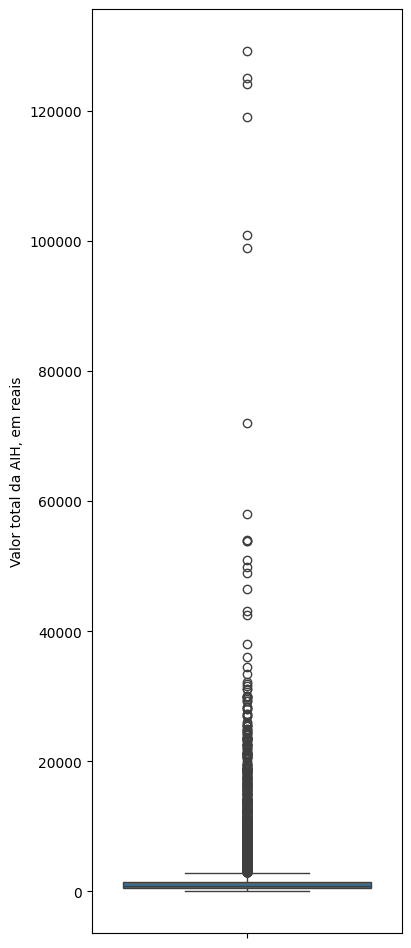

In [45]:
# Visualização gráfica da distribuição dos dados referente ao valor total da AIH

plt.figure(figsize=(4, 12))

ax4 = sns.boxplot(y='VAL_TOT', data=SIH_CONCAT)
ax4.set_ylabel('Valor total da AIH, em reais')

Pode-se observar que 75% das internações hospitalares tem custo igual ou menor que R$ 1438,45.

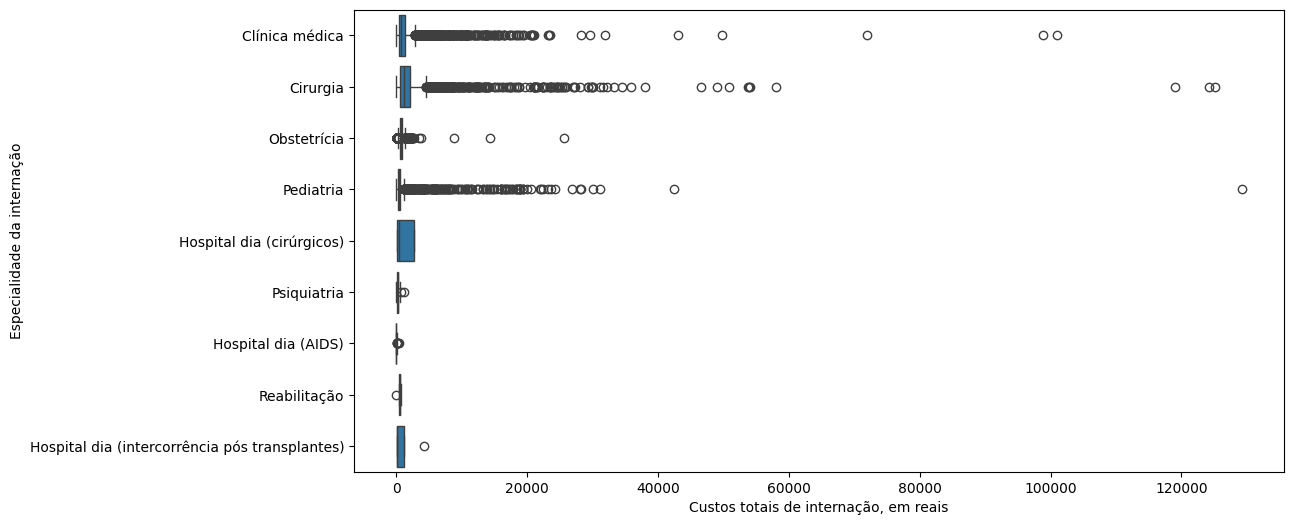

In [46]:
# Visualização gráfica da distribuição dos custos totais de internação, dependendo da especialidade da internação (dados que podem ser visualizados com ou sem os outliers)

plt.figure(figsize=(12, 6))
ax5 = sns.boxplot(x='VAL_TOT', y='ESPEC',
                  data=SIH_CONCAT,
                  #showfliers=False # Retira os valores outliers
                  )
ax5.set_xlabel('Custos totais de internação, em reais')
ax5.set_ylabel('Especialidade da internação')
plt.xticks(rotation=0)
plt.show()

Da mesma forma que o tempo de internação, em relação aos dados de custos, tem-se grande quantidade de valores outliers. Nesse cenário, temos como ranking de custos de internações os leitos pediátricos, cirúrgicos e de clínica médica.

Porém, ao retiramos os valores outliers, pode-se observar o ranking entre os leitos de hospital-dia (cirúrgicos), cirúrgicos e de clínica médica.

In [47]:
# Verificar a proporção do motivo de permanência/saída do usuário

SIH_CONCAT['COBRANCA'].value_counts(normalize=True)*100

,proportion
COBRANCA,
Alta melhorado,59.045886
Alta da mãe/puérpera e do recém-nascido,15.666060
Transferência para outro estabelecimento,6.306853
Óbito com DO fornecida pelo médico assistente,5.164746
Encerramento administrativo,2.617748
Alta com previsão de retorno p/acomp do paciente,2.102284
Alta por evasão,1.647463
Alta curado,1.475642
Permanência por intercorrência,1.364463


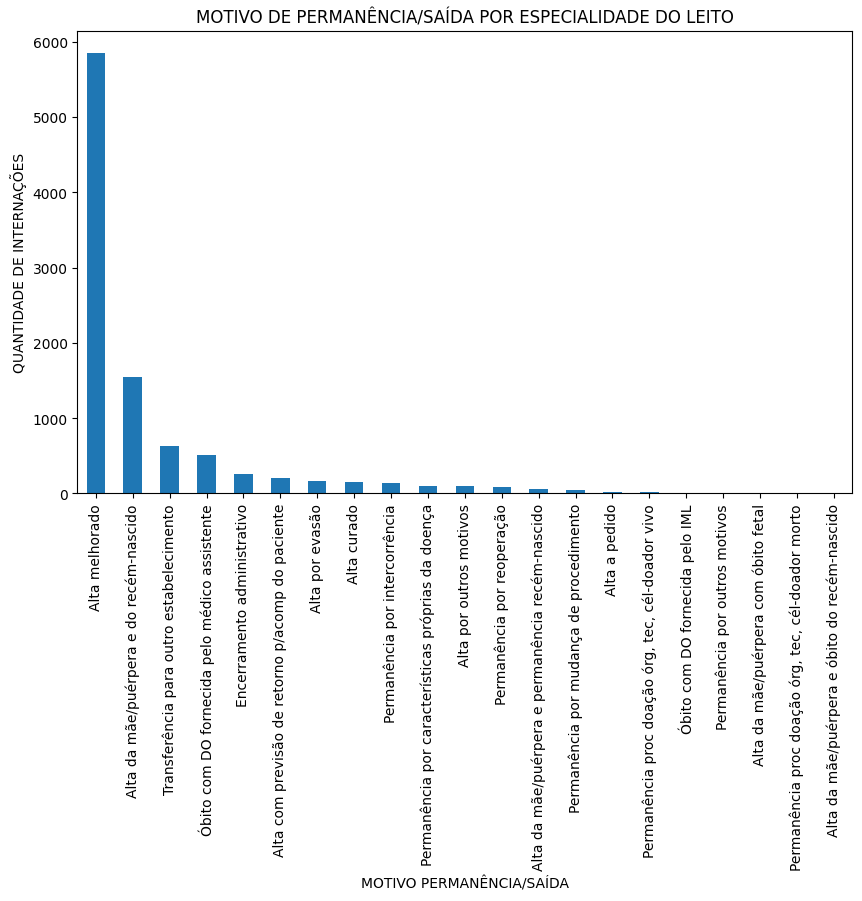

In [48]:
# Visualizar graficamente a contagem do motivo de permanência/saída do usuário

# Calcular os valores de contagem
value_counts = SIH_CONCAT['COBRANCA'].value_counts()

# Calcular o total de elementos para calcular a porcentagem
total = value_counts.sum()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax6 = value_counts.plot(kind='bar')

# Adicionar título e rótulos aos eixos
plt.title('MOTIVO DE PERMANÊNCIA/SAÍDA POR ESPECIALIDADE DO LEITO')
plt.xlabel('MOTIVO PERMANÊNCIA/SAÍDA')
plt.ylabel('QUANTIDADE DE INTERNAÇÕES')

# Alterar o ângulo dos rótulos do eixo X
plt.xticks(rotation=90)

plt.show()

Observa-se que 59,05% das internações possui como desfecho a alta melhorado, seguido de 15,66% de alta da mãe/puérpera e do recém-nascido.

In [49]:
# Verificar se há correlação entre o custo da internação com tempo de internação

SIH_CONCAT['VAL_TOT'].corr(SIH_CONCAT['QT_DIARIAS'])

0.0732587331657157

Observa-se que não há correlação forte entre o custo e o tempo de internação.

In [50]:
# Verificar a proporção de diagnóstico principal da internação

# Contar as ocorrências de cada diagnóstico e calcular a porcentagem
resultado = SIH_CONCAT['DIAG_PRINC'].value_counts(normalize=True) * 100

# Organizar em ordem decrescente
resultado_ordenado = resultado.sort_values(ascending=False)

# Exibir o resultado
print(resultado_ordenado)

DIAG_PRINC
O800    9.045886
J189    3.143319
O820    2.718819
J159    2.546998
I509    1.768749
          ...   
C835    0.010107
Z523    0.010107
D593    0.010107
P619    0.010107
C419    0.010107
Name: proportion, Length: 1329, dtype: float64


Observa-se que o principal diagnóstico principal de internação é CID O800, referente ao parto espontâneo cefálico.

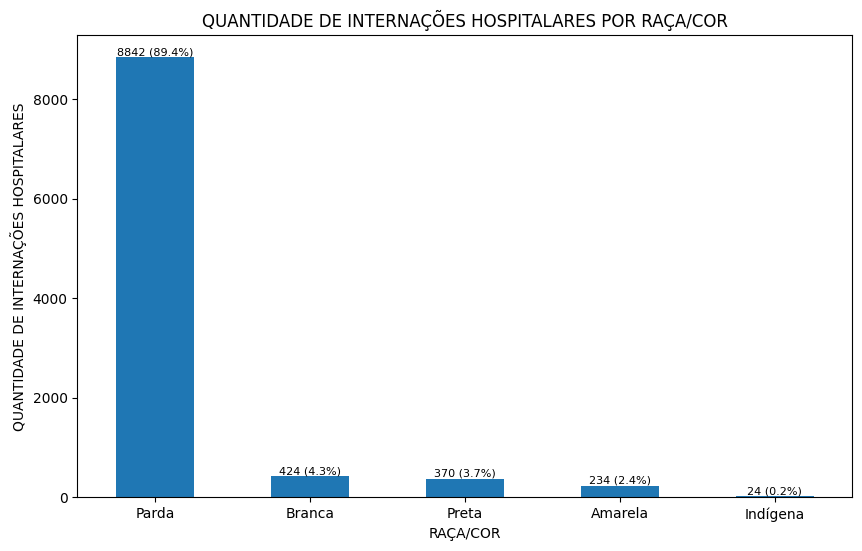

In [51]:
# Ver a contagem e proporção de internações hospitalares por raça/cor

# Calcular os valores de contagem
value_counts = SIH_CONCAT['RACA_COR'].value_counts()

# Calcular o total de elementos para calcular a porcentagem
total = value_counts.sum()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax7 = value_counts.plot(kind='bar')

# Adicionar os valores e as porcentagens nas barras
for i, v in enumerate(value_counts):
    percentage = (v / total) * 100
    ax7.text(i, v + 0.1, f'{v} ({percentage:.1f}%)', ha='center', va='bottom', fontsize=8)

# Adicionar título e rótulos aos eixos
plt.title('QUANTIDADE DE INTERNAÇÕES HOSPITALARES POR RAÇA/COR')
plt.xlabel('RAÇA/COR')
plt.ylabel('QUANTIDADE DE INTERNAÇÕES HOSPITALARES')

# Alterar o ângulo dos rótulos do eixo X
plt.xticks(rotation=0)

plt.show()

Observa-se que a maior proporção de usuários atendidos é da cor parda.

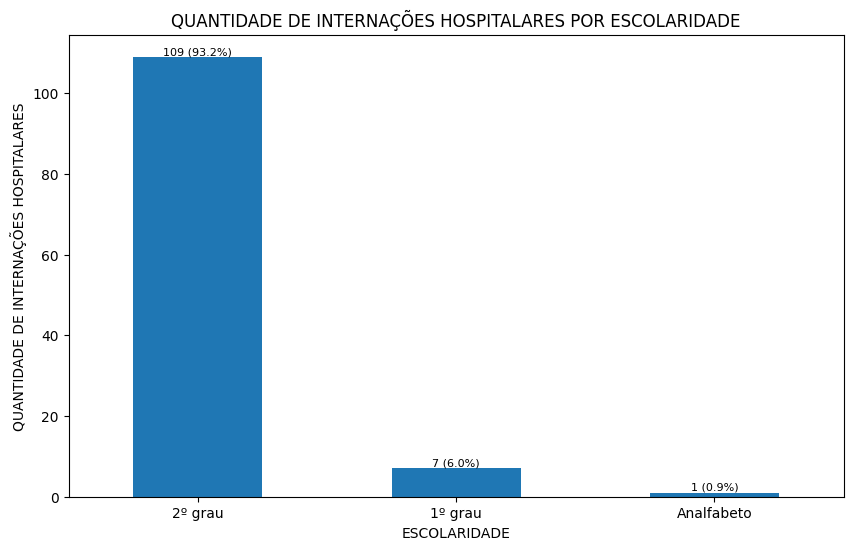

In [52]:
# Ver a contagem e proporção de internações hospitalares por escolaridade

# Calcular os valores de contagem
value_counts = SIH_CONCAT['INSTRU'].value_counts()

# Calcular o total de elementos para calcular a porcentagem
total = value_counts.sum()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax8 = value_counts.plot(kind='bar')

# Adicionar os valores e as porcentagens nas barras
for i, v in enumerate(value_counts):
    percentage = (v / total) * 100
    ax8.text(i, v + 0.1, f'{v} ({percentage:.1f}%)', ha='center', va='bottom', fontsize=8)

# Adicionar título e rótulos aos eixos
plt.title('QUANTIDADE DE INTERNAÇÕES HOSPITALARES POR ESCOLARIDADE')
plt.xlabel('ESCOLARIDADE')
plt.ylabel('QUANTIDADE DE INTERNAÇÕES HOSPITALARES')

# Alterar o ângulo dos rótulos do eixo X
plt.xticks(rotation=0)

plt.show()

Observa-se que a maioria dos usuários atendidos possui até o 2º grau de escolaridade. Porém, esse gráfico está apresentando dados correspondes a apenas 117 usuários. Assim, iremos realizar a mesma análise, porém sem concatenar os dados das planilhas SIH_FINAL e conv_instrucao, a fim de poder verificar as discrepâncias identificadas.

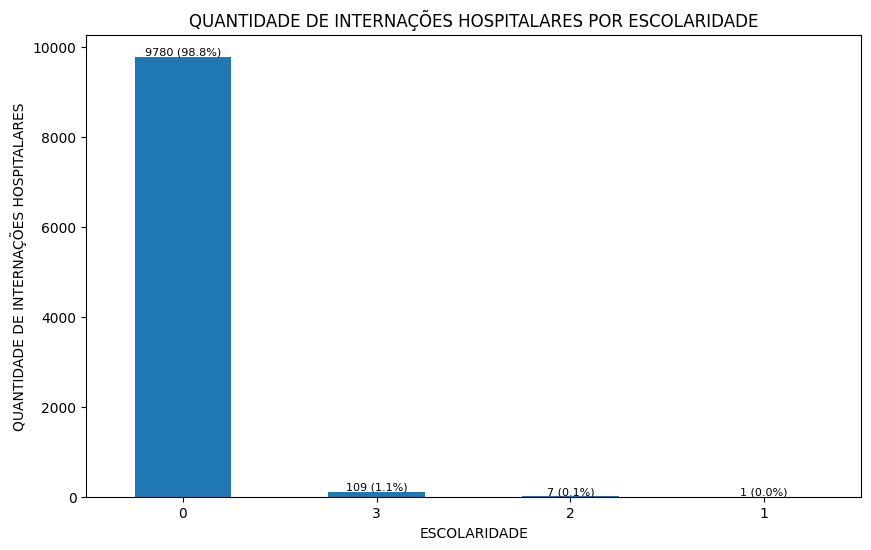

In [53]:
# Calcular os valores de contagem
value_counts = SIH_FINAL['INSTRU'].value_counts()

# Calcular o total de elementos para calcular a porcentagem
total = value_counts.sum()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax8 = value_counts.plot(kind='bar')

# Adicionar os valores e as porcentagens nas barras
for i, v in enumerate(value_counts):
    percentage = (v / total) * 100
    ax8.text(i, v + 0.1, f'{v} ({percentage:.1f}%)', ha='center', va='bottom', fontsize=8)

# Adicionar título e rótulos aos eixos
plt.title('QUANTIDADE DE INTERNAÇÕES HOSPITALARES POR ESCOLARIDADE')
plt.xlabel('ESCOLARIDADE')
plt.ylabel('QUANTIDADE DE INTERNAÇÕES HOSPITALARES')

# Alterar o ângulo dos rótulos do eixo X
plt.xticks(rotation=0)

plt.show()

Observa-se que a maioria dos dados (98,8%) referem-se aos dados 0, que representam NA na tabela de Convenções SIH RD. Portanto, inferimos que, ao concatenar os valores das duas planilhas, o NA foi identificado como valor nulo e não inserido no gráfico de barras anterior. Por conta do valor "NA" se tratar de praticamente a totalidade dos dados, não há como realizar uma análise aprofundada sobre a escolaridade dos usuários internados nesse período analisado.

### Aplicando modelos de correlação e regressão para análise de variáveis quantitativas

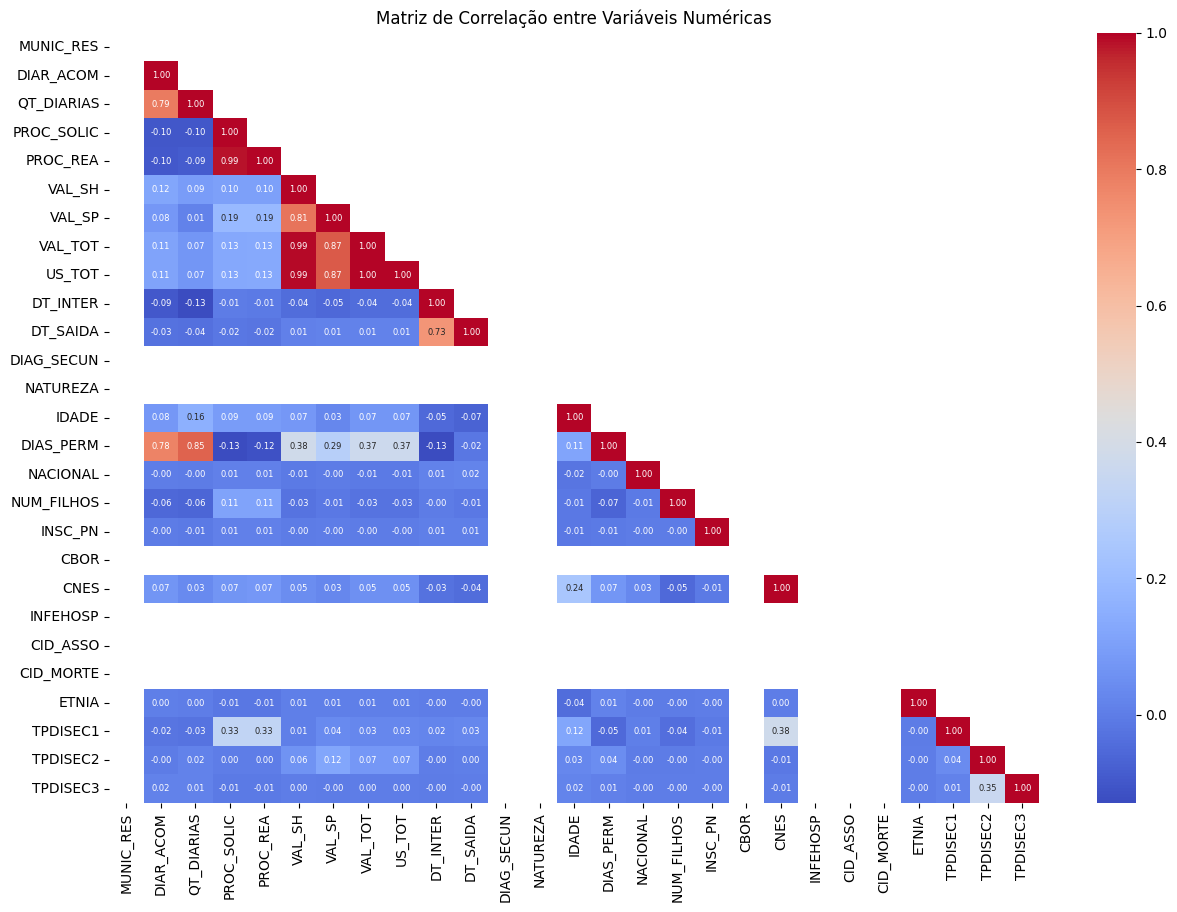

In [54]:
# Matriz de correlação para variáveis numéricas

# Filtra apenas as colunas numéricas
numerical_data = SIH_CONCAT.select_dtypes(include=['int64', 'float64'])

# Calcula a matriz de correlação
cor_matrix = numerical_data.corr()

# Cria uma máscara para ocultar os valores acima da diagonal
mask = np.triu(np.ones_like(cor_matrix, dtype=bool), k=1)

# Cria o gráfico de calor
plt.figure(figsize=(15, 10))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 6}, mask=mask)

# Título do gráfico
plt.title("Matriz de Correlação entre Variáveis Numéricas")

# Exibe o gráfico
plt.show()

### Regressão Linear

In [55]:
# Regressão entre dias de permanência e valor dos serviços hospitalares

# Adicionar uma constante para o modelo de regressão
X = sm.add_constant(SIH_CONCAT[['DIAS_PERM']])
y = SIH_CONCAT['VAL_SH']

# Ajustar o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Resumo dos resultados do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 VAL_SH   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     1651.
Date:                Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:44:35   Log-Likelihood:                -95086.
No. Observations:                9894   AIC:                         1.902e+05
Df Residuals:                    9892   BIC:                         1.902e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        196.5681     47.419      4.145      0.0

In [59]:
# Regressão entre dias de permanência e valor dos serviços profissionais

# Adicionar uma constante para o modelo de regressão
X = sm.add_constant(SIH_CONCAT[['DIAS_PERM']])
y = SIH_CONCAT['VAL_SP']

# Ajustar o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Resumo dos resultados do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 VAL_SP   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     934.8
Date:                Tue, 18 Feb 2025   Prob (F-statistic):          2.95e-196
Time:                        10:47:02   Log-Likelihood:                -79768.
No. Observations:                9894   AIC:                         1.595e+05
Df Residuals:                    9892   BIC:                         1.596e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.0775     10.083     13.099      0.0

In [60]:
# Regressão entre dias de permanência e valor total da AIH

# Adicionar uma constante para o modelo de regressão
X = sm.add_constant(SIH_CONCAT[['DIAS_PERM']])
y = SIH_CONCAT['VAL_TOT']

# Ajustar o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Resumo dos resultados do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                VAL_TOT   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     1549.
Date:                Tue, 18 Feb 2025   Prob (F-statistic):          6.35e-315
Time:                        10:47:13   Log-Likelihood:                -96718.
No. Observations:                9894   AIC:                         1.934e+05
Df Residuals:                    9892   BIC:                         1.935e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        396.3794     55.924      7.088      0.0

Com as análises de regressão linear acima, podemos inferir que há correlação entre os dias de permanência na internação com os valores da internação, sejam eles os valores dos serviços hospitalares ou totais. Não se observa correlação tão grande em relação aos valores de serviços profissionais.

Assim, tem-se que o aumento de 1 dia de internação aumenta em 186,2878 reais os serviços hospitalares e em 212,8209 reais o valor total da internação.